# Ruin Cliff Visualization: Dramatic Risk Thresholds

This notebook demonstrates the **Ruin Cliff visualization**, which shows how insurance retention (deductible) levels affect ruin probability. The visualization features:
- 3D-style gradient effects
- Automatic cliff edge detection
- Warning zones and callouts
- Inset plot for critical region detail

## Key Insights
- There's often a dramatic "cliff" where ruin probability increases sharply
- Optimal retention balances premium costs vs. catastrophic risk
- Visual warnings help executives identify dangerous retention levels

In [2]:
# Standard imports
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Any
import warnings

# Add parent directory to path for imports
sys.path.insert(0, os.path.abspath('..'))

warnings.filterwarnings("ignore", message="Glyph.*missing from font")
warnings.filterwarnings("ignore", message="This figure includes Axes")

# Import the visualization function
from src.visualization import plot_ruin_cliff

print("Setup complete!")

Setup complete!


## 1. Basic Ruin Cliff Visualization

First, let's create the default visualization with synthetic demonstration data.

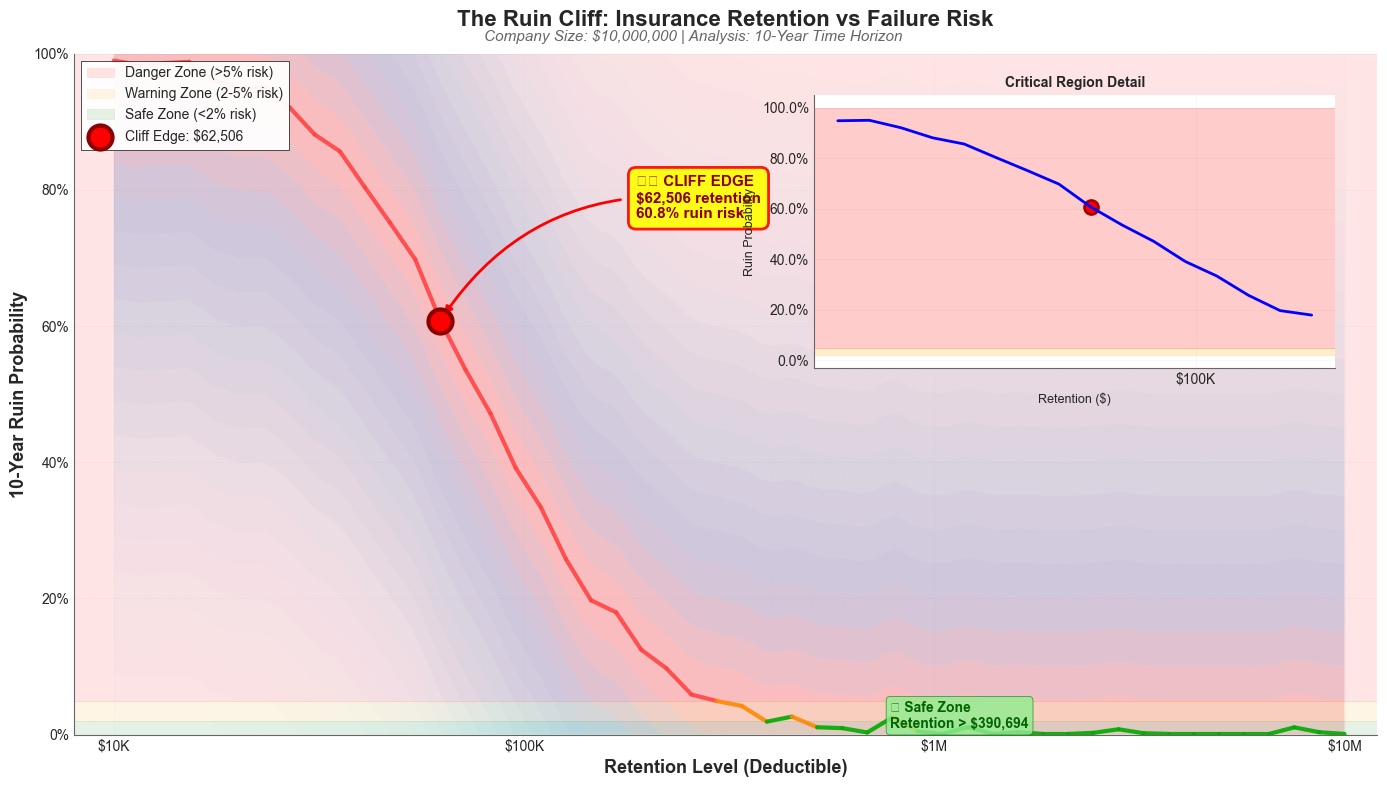


Key Features:
- Log scale on retention axis ($10K to $10M range)
- Red danger zone (>5% ruin probability)
- Orange warning zone (2-5% ruin probability)
- Green safe zone (<2% ruin probability)
- Automatic cliff edge detection and annotation
- Inset plot showing critical region detail


In [3]:
# Create basic ruin cliff visualization
fig = plot_ruin_cliff(
    title="The Ruin Cliff: Insurance Retention vs Failure Risk"
)
plt.show()

print("\nKey Features:")
print("- Log scale on retention axis ($10K to $10M range)")
print("- Red danger zone (>5% ruin probability)")
print("- Orange warning zone (2-5% ruin probability)")
print("- Green safe zone (<2% ruin probability)")
print("- Automatic cliff edge detection and annotation")
print("- Inset plot showing critical region detail")

## 2. Customized Retention Range

Adjust the retention range for specific analysis needs.

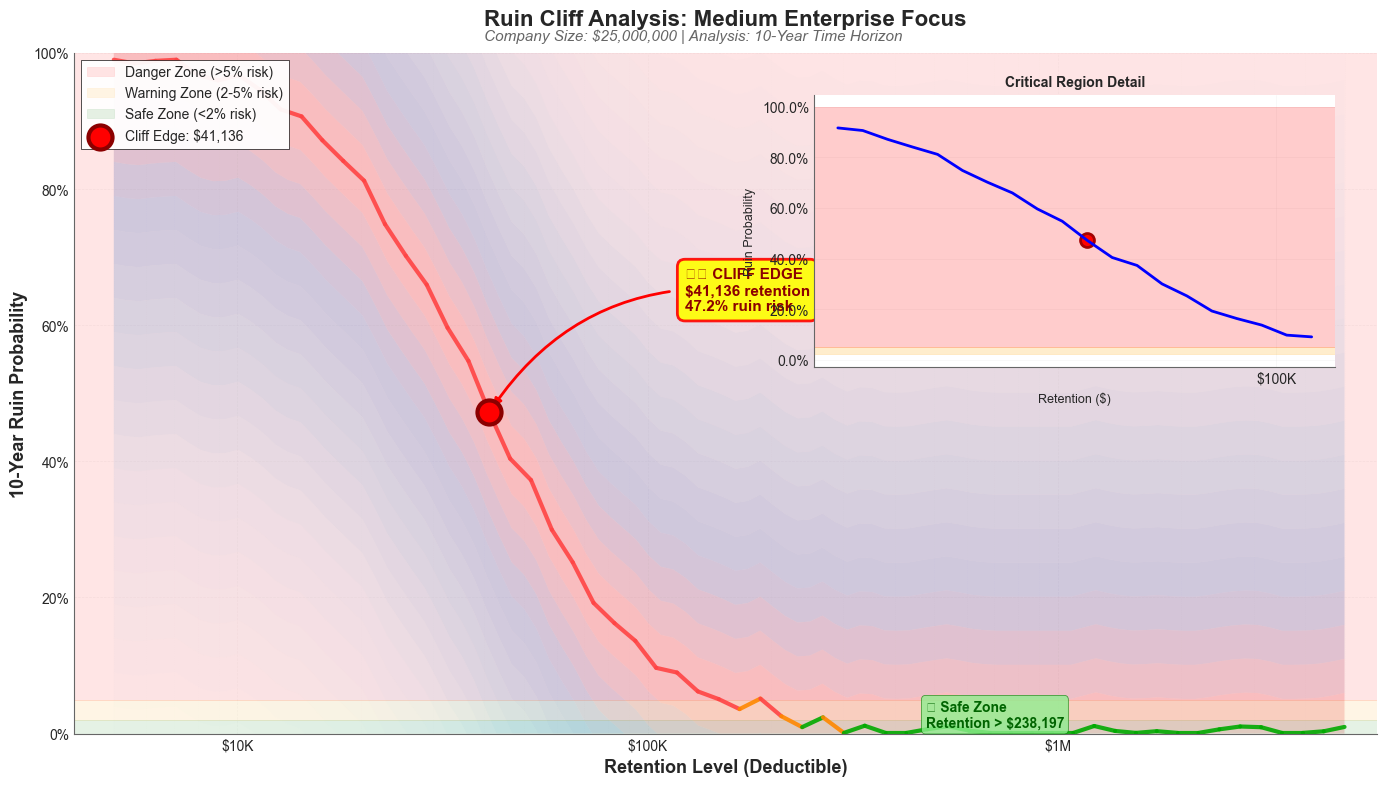


Customization applied:
- Retention range: $5K to $5M (better for medium enterprises)
- Company size: $25M (shown in subtitle)
- 60 data points for smoother visualization


In [4]:
# Create visualization with custom retention range
fig = plot_ruin_cliff(
    retention_range=(5_000, 5_000_000),  # $5K to $5M
    n_points=60,  # More points for smoother curve
    title="Ruin Cliff Analysis: Medium Enterprise Focus",
    company_size=25_000_000  # $25M company
)
plt.show()

print("\nCustomization applied:")
print("- Retention range: $5K to $5M (better for medium enterprises)")
print("- Company size: $25M (shown in subtitle)")
print("- 60 data points for smoother visualization")

## 3. Without 3D Effects (Cleaner Style)

For presentations that prefer cleaner visuals without gradient effects.

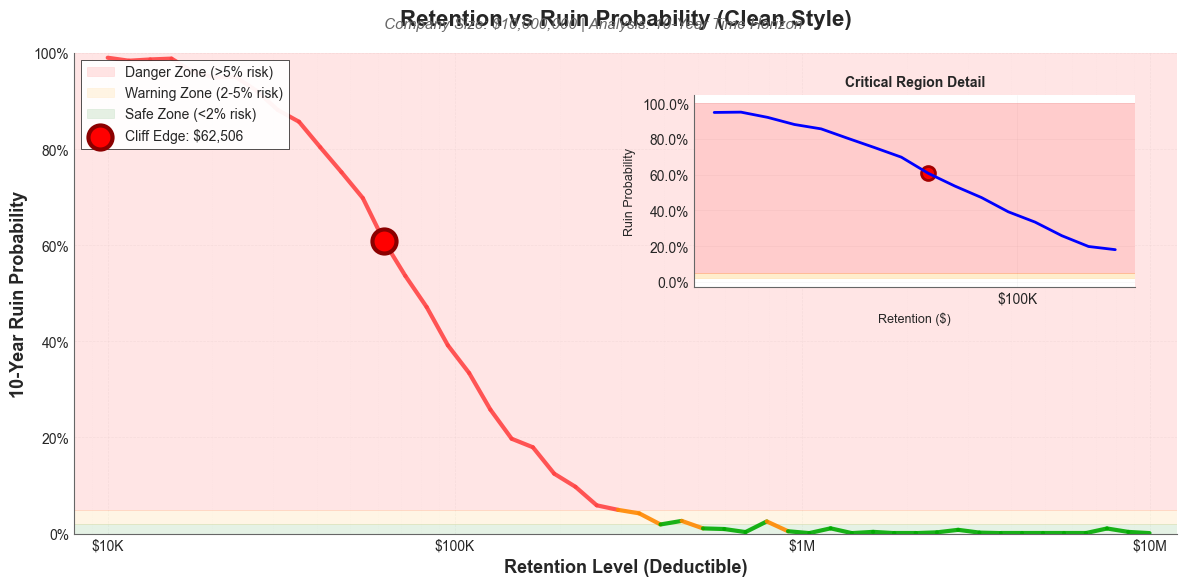


Clean style features:
- No 3D gradient background
- No warning callouts
- Still shows danger zones as colored bands
- Cliff edge marker remains visible


In [5]:
# Create clean visualization without 3D effects
fig = plot_ruin_cliff(
    show_3d_effect=False,
    show_warnings=False,  # Also remove warning callouts for cleaner look
    title="Retention vs Ruin Probability (Clean Style)",
    figsize=(12, 6)
)
plt.show()

print("\nClean style features:")
print("- No 3D gradient background")
print("- No warning callouts")
print("- Still shows danger zones as colored bands")
print("- Cliff edge marker remains visible")

## 4. Using Real Simulation Data

Example of how to use the visualization with actual simulation results.

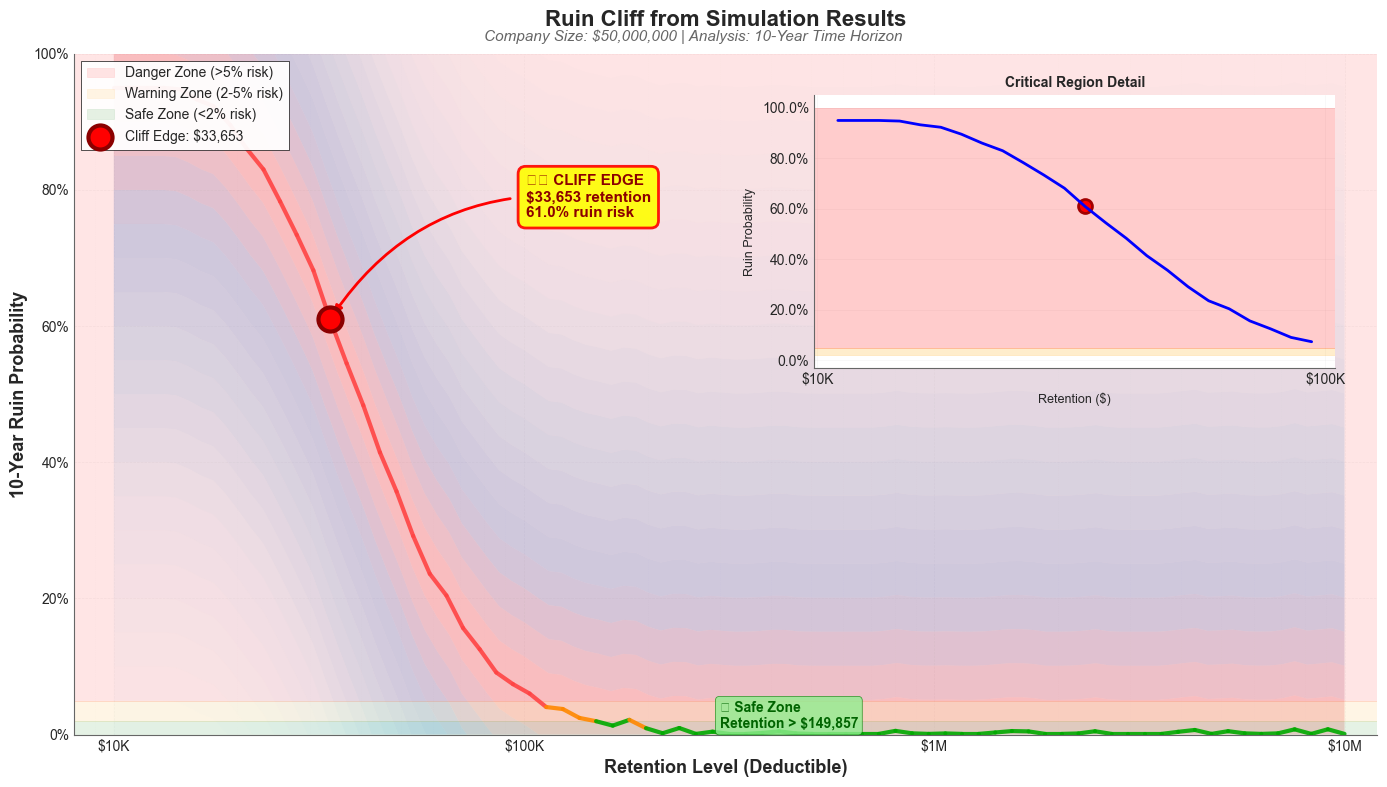


Simulation Statistics:
- Cliff edge at retention: $33,653
- Ruin probability at cliff: 61.0%
- Safe zone starts at: $149,857


In [6]:
# Generate example simulation data
# In practice, this would come from RuinProbabilityAnalyzer
def generate_simulation_data(n_points=50):
    """Generate realistic ruin probability data."""
    retentions = np.logspace(4, 7, n_points)  # $10K to $10M
    
    # Create realistic curve: high retention = low risk, but with cliff
    log_ret = np.log10(retentions)
    log_ret_norm = (log_ret - log_ret.min()) / (log_ret.max() - log_ret.min())
    
    # Simulate different cliff behaviors
    # Sharp cliff at 20% of range
    cliff_position = 0.2
    cliff_steepness = 20
    
    # Sigmoid function for cliff effect
    ruin_probs = 1 / (1 + np.exp(cliff_steepness * (log_ret_norm - cliff_position)))
    
    # Add realistic noise
    noise = np.random.RandomState(42).normal(0, 0.005, n_points)
    ruin_probs = np.clip(ruin_probs + noise, 0.001, 0.95)
    
    return {
        'retentions': retentions,
        'ruin_probs': ruin_probs
    }

# Generate and visualize
simulation_data = generate_simulation_data(n_points=75)

fig = plot_ruin_cliff(
    simulation_data=simulation_data,
    title="Ruin Cliff from Simulation Results",
    company_size=50_000_000
)
plt.show()

# Show statistics
cliff_idx = np.argmax(np.abs(np.gradient(simulation_data['ruin_probs'])))
cliff_retention = simulation_data['retentions'][cliff_idx]
cliff_prob = simulation_data['ruin_probs'][cliff_idx]

print(f"\nSimulation Statistics:")
print(f"- Cliff edge at retention: ${cliff_retention:,.0f}")
print(f"- Ruin probability at cliff: {cliff_prob:.1%}")
safe_retentions = simulation_data['retentions'][simulation_data['ruin_probs'] < 0.02]
if len(safe_retentions) > 0:
    print(f"- Safe zone starts at: ${safe_retentions[0]:,.0f}")

## Summary and Best Practices

### Key Takeaways
1. **The Cliff Effect**: There's typically a sharp threshold where risk increases dramatically
2. **Visual Warning System**: Color zones and callouts help identify dangerous retention levels
3. **3D Effects**: Optional gradient backgrounds add visual depth and emphasis
4. **Inset Details**: Zoom view helps analyze the critical transition region

### When to Use This Visualization
- **Insurance purchasing decisions**: Finding optimal retention levels
- **Risk assessment**: Understanding failure thresholds
- **Executive reporting**: Communicating risk dramatically and clearly
- **Scenario planning**: Comparing different retention strategies